MNIST dataset

CNN

Keras is a high level neural network's API written in python

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Understand the image format
x_train[0].shape

(28, 28)

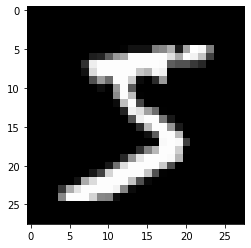

In [5]:
plt.imshow(x_train[0],cmap = "gray")

In [6]:
y_train[0]

5

In [7]:
# Preprocess the image data
image_height,image_width = 28,28

In [8]:
x_train = x_train.reshape(60000,image_height*image_width)
x_test  = x_test.reshape(10000,image_height*image_width)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(x_train[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
x_train /=255.0
x_test /= 255.0
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_test.shape)
print(y_train.shape)


(10000,)
(60000,)


Converting the target value in to 10 bins. So we will see that the output form a model will then go in into one of these 10 bins

In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [13]:
# Building the model
model = Sequential()

model.add(Dense(512,activation='relu',input_shape = (784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

In [14]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
# train the model
history = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1839 - accuracy: 0.9436 - val_loss: 0.1015 - val_accuracy: 0.9691
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0806 - accuracy: 0.9742 - val_loss: 0.0815 - val_accuracy: 0.9755
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0975 - val_accuracy: 0.9718
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0815 - val_accuracy: 0.9772
Epoch 5/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0842 - val_accuracy: 0.9785
Epoch 6/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.0870 - val_accuracy: 0.9796
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.1086 - val_ac

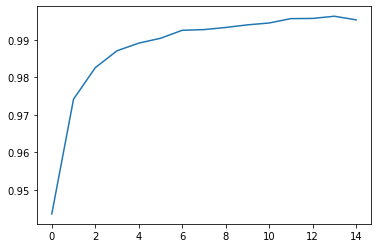

In [16]:
# Plotting accuracy of the model

plt.plot(history.history['accuracy'])

In [17]:
# Evaluating the model

score = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1463 - accuracy: 0.9780


Fully connected neural networks typically don't work well on images. This is because each pixel is an input, then as we add morelayers the amount of parameters increases exponentially. 32* 32 That's a 32 high and 32 wide and with three color channels. A single fully connected neurom in the first layer of neural network  is 32 x 32 x 3 = 3072 weights. 

similarly for 120*120*3 = 120,000 weights

The other challenge is that the number of parameters this large can quickly lead to over-fitting.

The solution is CNN - The convolution is a mathematical operation used to extract features from an image. The convolution is defined by an image kernel. The image kernel is small matrix. Most of the time , a 3x3 kernel matrix is used . Image -> kernel -> convolved feature. 

Padding
Pooling

If a n*n matrix convolved with an f*f matrix with padding p then the size of the output image will be (n+2p-f+1)*(n+2p-f+1)

Stride - it is the number of pixels shifts over the input matrix. For padding p ,filter f*f and input image of size n*n and stride s, the output image dimension will be  
[(n+2p-f+1)/s+1] * [(n+2p-f+1)/s+1]

Pooling  - A pooling layer is another building block of a CNN model. Pooling function is to progressively reduce the spatial size of the representation to reduce the network complexity and computational cost.

Max Pooling  - it is simply a rule to take the maximum of a region and it helps to proceed with the most important features from the image. Max pooling selects the brighter pixels form the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image

Average Pooling - It will consider the average of the region. Avg pooling blends all the values of a given region. 

The benefit of CNN is that it reduces the chance of your model over-fitting. 

In neural network we only had fully connected layer, otherwise known as the dense layer. With CNN we have more operations such as the convolution operation max pooling, flattening and also a fully connected or dense layer.

In [19]:
# Import the libraries

from keras.layers import Conv2D,MaxPool2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [20]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [39]:
# CNN Model Development
cnn = Sequential()
cnn.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1),padding='same',activation='relu'))

cnn.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPool2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                401472    
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                      

In [41]:
history = cnn.fit(x_train,y_train,epochs = 10, verbose = 1, validation_data=(x_train,y_train))

Epoch 1/10
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0325 - val_accuracy: 0.9893
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0201 - val_accuracy: 0.9937
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0109 - val_accuracy: 0.9968
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0117 - val_accuracy: 0.9962
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0060 - val_accuracy: 0.9979
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0116 - val_accuracy: 0.9960
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0046 

## Image recognition using  CNN 

In this project we will be using CIFAR-10 dataset. This dataset includes thousands of pictures of 10  different kinds of objects

In [39]:
# In this project we will be using CIFAR-10 dataset. This dataset includes thousands of pictures of 10 different kinds of 
# objects like airplanes, automobiles, birds and so on. Each image in the dataset includes a matching label so we know
# what kind of image it is. The images in the CIFAR-10 dataset are only 32x32 pixels. These are very low resolution images.

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

In [48]:
import matplotlib.pyplot as plt

In [81]:
# Load the dataset

(X_train,y_train),(X_test, y_test)= cifar10.load_data()

In [82]:
# Normalize the data

X_train= X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255.0
X_test /=255.0

In [83]:
# Convert class vectors to binary class matrices

y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [84]:
# Create model and add layers

# Dropout- The idea is that between certain layers, we will randomly throw away some of the data ny cutting some of the
# connections between the layers. This is called as dropuout. Usually, we will add dropuout right after max pooling layers
# or after a group of dense layers.

model=Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

#Print the summary fo the model

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_43 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

In [85]:
# Train the model

model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_test,y_test),
    shuffle=True
)

Epoch 1/30
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5076 - accuracy: 0.4482 - val_loss: 1.2062 - val_accuracy: 0.5636
Epoch 2/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1427 - accuracy: 0.5950 - val_loss: 0.9624 - val_accuracy: 0.6599
Epoch 3/30
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9985 - accuracy: 0.6485 - val_loss: 0.8567 - val_accuracy: 0.7015
Epoch 4/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9009 - accuracy: 0.6853 - val_loss: 0.8288 - val_accuracy: 0.7167
Epoch 5/30
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8420 - accuracy: 0.7040 - val_loss: 0.7788 - val_accuracy: 0.7323
Epoch 6/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7951 - accuracy: 0.7229 - val_loss: 0.7926 - val_accuracy: 0.7302
Epoch 7/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7549 - accuracy: 0.7343 - val_loss: 0.7623 -

In [86]:
# Save the neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

4411

In [87]:
# save the trained neural network weights
    
model.save_weights("model_weights.h5")

In [88]:
# Making predictions 
from  keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [89]:
# CIFAR-10 dataset class labels

class_labels = ['Planes','Car','Bird','Cat','Deer','Dog','Frog','Horse','Boat','Truck']

In [90]:
# Load the json file that contains the model structure

f = Path("model_structure.json")
model_structure = f.read_text()

In [91]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [92]:
# Reload the model trained weights
model.load_weights('model_weights.h5')

In [93]:
# Load an image file to test
img= image.load_img('frog.png',target_size = (32,32))

In [94]:
# Convert the image to a numpy array

image_to_test = image.img_to_array(img)

In [95]:
# add a fourth dimension, since keras expects a list of images, not a single image
list_of_images = np.expand_dims(image_to_test,axis = 0)

In [96]:
# Make prediction using the model

results = model.predict(list_of_images)

In [97]:
# Since we are only testin one image, we only need to check the first result

single_result = results[0]

In [98]:
# We will get a likelihood score for all 10 possible classes. Find out which class has the highest
# score
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [99]:
# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

In [100]:
# Printing the result
print('This is image is a {} - Likelihood: {:2f}'.format(class_label, class_likelihood))

This is image is a Planes - Likelihood: 1.000000


###    Pretrained VGG16 neural network model for object detection

Sometimes instead of using own NN designs fro scratch, it makes sense to reuse an existing neural network design as a starting point for projects. These pre_trained models are trained on large data sets. So, we can use those pretrained models and either use them directly or use them as a starting point for our own training .

image recognition models included in keras are all trained to recognise images from the imageNet dataset

ImageNet dataset is a collection of millions of pictures of objects that have been labelled so that you can use them to train computers to recognise those objects.

Lets talk about the NN designs included with Keras that we can use

VGG - VGG is a deep NN with either 16 or 19 layers. Its a very standard CNN design. Its still widely used as a basis for other models because its easy to work with and easy to understand.

ResNet-50 - it was devleped in 2015. It is a 50 layer neural network that manages to be more accurate and uses less memory than VGG. 

Inception V3 is another design fro 2015 that also performs very well. 

In [101]:
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16

In [102]:
# load keras vgg16 model that was pretrained against the imageNet database

model = vgg16.VGG16()

553476096/553467096 [==============================] - 74s 0us/step


In [104]:
img = image.load_img("bay.jpeg",target_size=(224,224))   

In [105]:
# Conver the image to numpy array
x = image.img_to_array(img)

In [106]:
# Add a fourth dimension since keras expects a list of images

x = np.expand_dims(x,axis = 0)

In [107]:
# Normalise the input imags pixel values to the range used when training the model
x = vgg16.preprocess_input(x)


In [108]:
# Run the impage throught the  deep NN to make a prediction

predictions = model.predict(x)

In [109]:
# Look up the names of the predicted classes. Index zero is the results for the first image
predicted_classes = vgg16.decode_predictions(predictions)

49152/35363 [=========================================] - 0s 1us/step


In [110]:
print("Top Predictions for this image:")
for imagenet_id,name,likelihood in predicted_classes[0]:
    print("prediction: {} - {:2f}".format(name,likelihood))

Top Predictions for this image:
prediction: seashore - 0.395213
prediction: promontory - 0.326128
prediction: lakeside - 0.119613
prediction: breakwater - 0.062801
prediction: sandbar - 0.045267


Transfer Learning as an alternative to training a neural network.

It is where you take a model trained on one set of data and then use the knowledge it learned to give it a headstart when solving a new problem.

Transfer learning is also very useful when you only have a small training dataset. If you only have a few hundred training images for your image recognition system, you don't have enough data to teach your model from skratch, so it makes sense to start with a model trained for something else and adapt it to your problem.

In [111]:
import sys

In [112]:
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [113]:
print("noice")

noice
